In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel("/kaggle/input/contextaware/BEmoC7k.xlsx")

In [3]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [4]:
df_train.dropna(inplace=True)

In [5]:
df_train.dtypes

TEXT       object
classes    object
dtype: object

In [6]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
df_train['classes'].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [9]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [10]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [11]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 67.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=5751e467bfb9b7a0c9464a0b0322e85cbf7298e6daeb61a83c6051fd86b9dcc1
  Stored in directory: /roo

In [12]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [13]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 57


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [14]:
print(trn)

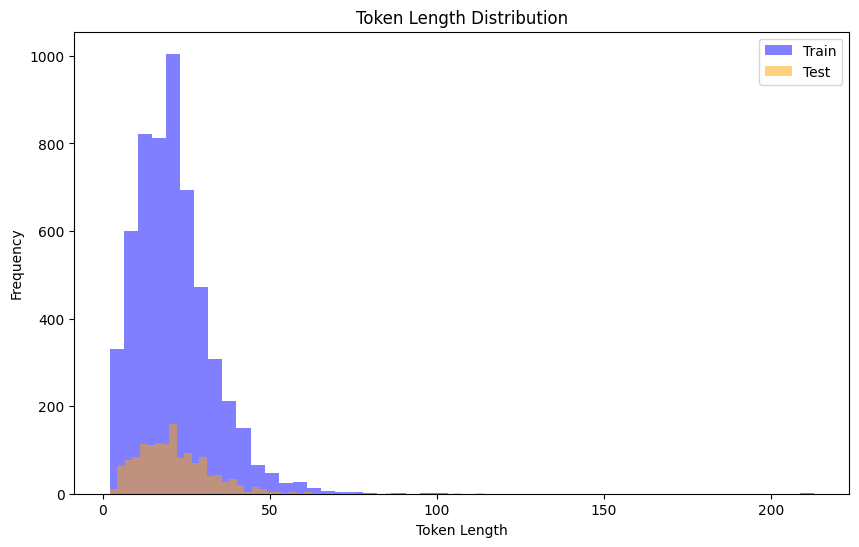

In [15]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [16]:
model = t.get_classifier()

In [17]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [18]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [19]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 459s 619ms/step - loss: 1.6179 - accuracy: 0.3343 - val_loss: 1.1392 - val_accuracy: 0.5614
Epoch 2/10
700/700 [==============================] - 430s 614ms/step - loss: 1.1706 - accuracy: 0.5670 - val_loss: 1.0576 - val_accuracy: 0.5900
Epoch 3/10
700/700 [==============================] - 429s 613ms/step - loss: 1.0045 - accuracy: 0.6270 - val_loss: 1.0340 - val_accuracy: 0.6100
Epoch 4/10
700/700 [==============================] - 429s 613ms/step - loss: 0.8909 - accuracy: 0.6698 - val_loss: 1.0680 - val_accuracy: 0.6257
Epoch 5/10
700/700 [==============================] - 429s 613ms/step - loss: 0.8087 - accuracy: 0.7029 - val_loss: 1.0675 - val_accuracy: 0.6193
Epoch 6/10
700/700 [==============================] - 430s 614ms/step - loss: 0.6582 - accuracy: 0.7543 - val_loss: 1.0668 - val_accuracy: 0.6421
Epoch 7/10
700/700 [==============================] - 430s 61

In [20]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [21]:
classes=t.get_classes()

In [22]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 15s 268ms/step
              precision    recall  f1-score   support

       anger       0.57      0.50      0.53       211
     disgust       0.55      0.57      0.56       271
        fear       0.72      0.80      0.76       192
         joy       0.80      0.81      0.80       305
     sadness       0.63      0.69      0.66       265
    surprise       0.67      0.54      0.60       156

    accuracy                           0.66      1400
   macro avg       0.66      0.65      0.65      1400
weighted avg       0.66      0.66      0.66      1400



In [23]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [24]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)
